![portada](../Data/Portada2.jpg)


1. [Introducción](#1.-Introduccion)
2. [Hipótesis](#2.-Hipotesis)
3. [Metodología](#3.-Metodologia)
4. [Descripción de las variables](#4.-Descripcion-de-las-variables)
5. [Análisis](#5.-Analisis)
6. [Conclusiones](#6.-Conclusiones)

## 1. Introduccion

En el mundo actual, el análisis de datos desempeña un papel fundamental en la toma de decisiones empresariales. Los analistas de datos son profesionales altamente demandados que utilizan sus habilidades técnicas y conocimientos para extraer información valiosa a partir de conjuntos de datos. Sin embargo, comprender la relación entre los distintos puestos de analista de datos y los salarios asociados puede ser clave tanto para los empleadores como para los profesionales en busca de oportunidades laborales.

En este Análisis Exploratorio de Datos (EDA), exploraremos los salarios de los analistas de datos en función del nivel de experiencia y el puesto específico. Investigaremos cómo los salarios varían entre diferentes niveles de experiencia, desde analistas de datos junior hasta analistas de datos senior, y también analizaremos las diferencias salariales entre distintos puestos, como analista de datos de negocios, analista de datos de marketing, analista de datos financieros, entre otros.

Al realizar este EDA, esperamos descubrir patrones, tendencias y relaciones que nos permitan comprender mejor la estructura salarial dentro del campo de los analistas de datos. Estos hallazgos podrían proporcionar información valiosa tanto para los empleadores, que podrían ajustar sus políticas salariales para atraer y retener talento, como para los profesionales en busca de oportunidades laborales, que podrían utilizar esta información para tomar decisiones informadas sobre su carrera.

A través de visualizaciones, análisis estadísticos y exploración de datos, buscaremos revelar conocimientos clave sobre los salarios de los analistas de datos según el nivel de experiencia y el puesto. Este análisis puede servir como punto de partida para un análisis más profundo y ayudar a orientar las decisiones relacionadas con la compensación salarial en el campo de los analistas de datos.



## 2. Hipotesis

Nuestra principal hipotesis son existencia de correlación entre los años de experiencia y el salario. Pero en este EDA queremos indagar mas profundamente. Buscamos encontrar la relación entre el salario y tamaño de la empresa, asi como el país de procedencia de la empresa. 

Valoramos también el tipo de contrato y las consecuencias que tiene en la retribución salarial.

## 3. Metodologia

En este estudio, se realizará un análisis exploratorio de datos (EDA) para investigar los salarios en el campo de data science. El objetivo es comprender las relaciones y patrones que existen entre los salarios y las variables seleccionadas: 'work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location' y 'company_size'.

Llevaremos a cabo un análisis descriptivo de las variables para comprender su distribución y características estadísticas relevantes. Buscaremos las relaciones entre las variables seleccionadas y los niveles salariales de los profesionales de data science mediante técnicas de visualización y análisis estadístico para investigar posibles correlaciones o asociaciones. 

## 4. Descripcion de las variables.


1. **work_year**: El año en que se pagó el salario.

2. **experience_level** : El nivel de experiencia en el trabajo durante el año. 

    - EN se refiere a nivel de entrada/junior.
    - MI se refiere a nivel intermedio.
    - SE se refiere a nivel senior/experto.
    - EX se refiere a nivel ejecutivo/director.

    Esta variable categorica ha sido sustituida por la media de salarios de cada nivel de experiencia.

3. **employment_type**: Tipo de contrato del sujeto. En el dataframe original podemos observar la distinción entre:
    - PT se refiere a medio tiempo.
    - FT se refiere a tiempo completo.
    - CT se refiere a contrato.
    - FL se refiere a trabajo independiente.

4. **job_title**: El puesto en el que se trabajó durante el año.

5. **salary**: El monto total del salario bruto pagado.

6. **salary_currency**: La moneda del salario pagado, en formato de código de moneda ISO 4217.

7. **salaryinusd**: El salario en USD.

8. **employee_residence**: El país de residencia principal del empleado durante el año de trabajo.

9. **remote_ratio**: La cantidad general de trabajo realizado de forma remota.

10. **company_location**: El país de la oficina principal del empleador o sucursal contratante.

11.  **company_size**: El número medio de personas que trabajaron para la empresa durante el año.


## 5. Analisis.


Comenzaremos el análisis observando la influencia de las distintas variables sobre el salario. Para ello emplearemos el csv raw, ya que es el que contiene las variables categoricas.

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../Data/raw/ds_salaries.csv")
df.max()

work_year                             2023
experience_level                        SE
employment_type                         PT
job_title             Staff Data Scientist
salary                            30400000
salary_currency                        USD
salary_in_usd                       450000
employee_residence                      VN
remote_ratio                           100
company_location                        VN
company_size                             S
dtype: object

El trabajo mejor pagado en 2023 ha sido para el puesto de Data Scientist, con un salario anual de 450.000 USD. Se trata de un trabajador senior, y sorprendentemente, que trabaja a tiempo parcial. Esto nos puede indicar que la experencia del trabajador influye mas sobre su sueldo, que el tipo de contrato. 

En el siguiente gráfico, podemos observar los 10 puestos de trabajo más populares en datascience, según los datos que hemos recolectado.

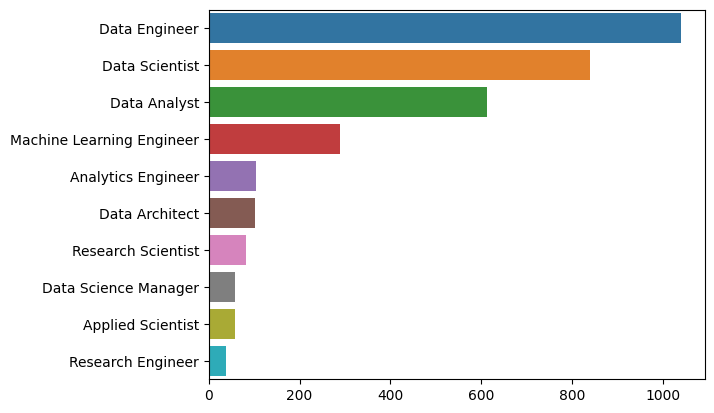

In [20]:
job_titles = df["job_title"].value_counts().head(10)
sns.barplot(y=job_titles.index, x= job_titles.values);

En cambio, los 10 puestos mejor pagados, no forman parte de los mas comunes. De estos datos, se puede concluir que los puestos de mayor remuneración están asociados a roles de liderazgo y experiencia avanzada en el campo de la ciencia de datos, como Data Science Tech Lead, Principal Data Scientist y Director of Data Science. También se observa que los puestos relacionados con arquitectura de datos y análisis, como Cloud Data Architect y Data Analytics Lead, también están entre los mejor pagados.

In [51]:
job_titles_salari = df.groupby("job_title")["salary_in_usd"].mean()
job_titles_salari = job_titles_salari.sort_values(ascending=False)
mask = job_titles_salari[['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Analytics Engineer', 'Data Architect',
       'Research Scientist', 'Data Science Manager', 'Applied Scientist',
       'Research Engineer']]

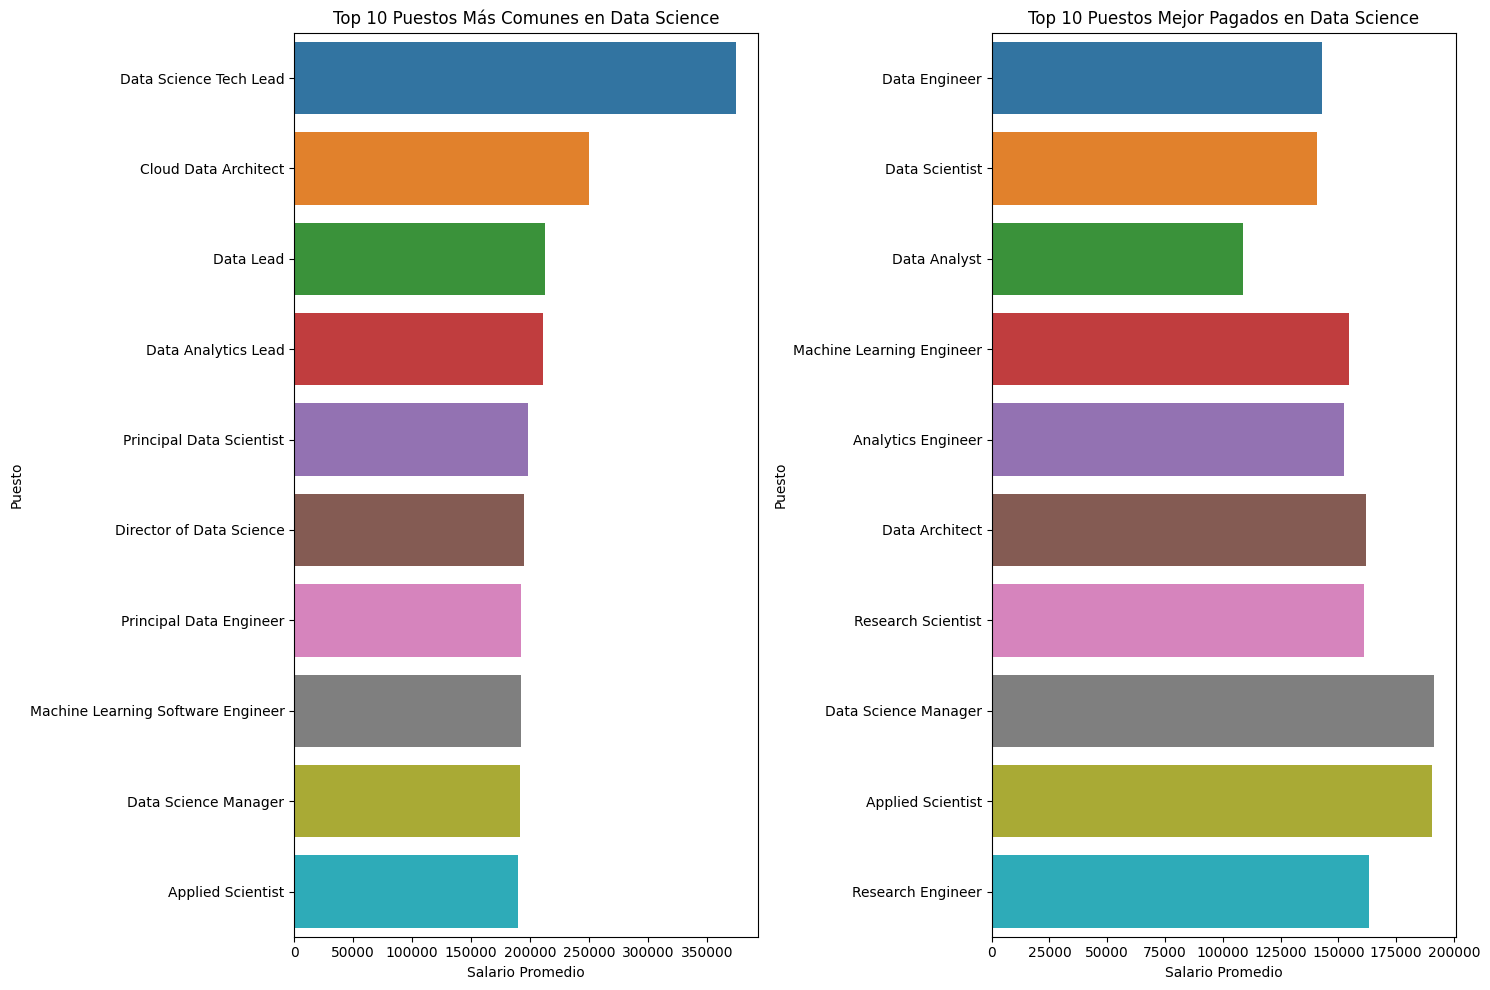

In [53]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
# Primer gráfico
plt.subplot(1, 2, 1)
sns.barplot(y=job_titles_salari.head(10).index, x=job_titles_salari.head(10).values)
plt.title('Top 10 Puestos Más Comunes en Data Science')
plt.xlabel('Salario Promedio')
plt.ylabel('Puesto')

# Segundo gráfico
plt.subplot(1, 2, 2)
sns.barplot(y=mask.index, x=mask.values)
plt.title('Top 10 Puestos Mejor Pagados en Data Science')
plt.xlabel('Salario Promedio')
plt.ylabel('Puesto')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()